In [1]:
import os
import sys
from collections import defaultdict
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style()

In [2]:
otus = pd.read_csv("../data/otus.csv")
comp = pd.read_csv("../data/comp.csv")

# chem = pd.read_csv("../data/chem.csv")
# chem.drop(["Водород", "C3H8 (ДТП-1)"], axis=1, inplace=True)
# chem["Номер станции"] = chem["Номер станции"].str.strip()

In [3]:
otus.head(2)

,sample_name,cluster_id,cluster_acc,n_seq,avg_seq_ident,similarity,sequence,reference,classifications,cellularity,taxonomy
0,150cm Fin,125618.0,M70975:4:000000000-K68VJ:1:1101:2236:19011,1686.0,98.74,99.6,TACATAAGGAGCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGCT...,JQ087016.1.1512,ncbi|138.1|244328|root,cellular organisms,Bacteria <prokaryotes>&Terrabacteria group&Fir...
1,185cm Gotland,79360.0,M70975:4:000000000-K68VJ:1:1105:11330:14955,1672.0,98.96,98.5,GAGTGTCCGCCGCGGTAATACATAAGGAGCAAGCGTTATCCGGAAT...,JQ087016.1.1512,ncbi|138.1|244328|root,cellular organisms,Bacteria <prokaryotes>&Terrabacteria group&Fir...


In [4]:
otus.sample_name.value_counts()

2cm Gotland      3166
20cm Gotland     2917
220cm Gotland    2738
80cm Gotland     2720
2cm Fin          2537
120cm Gotland    2433
80cm Fin         2212
20cm Fin         2170
185cm Gotland    2161
10cm Fin         2035
40cm Fin         2030
110cm Fin        2015
145cm Gotland    1928
40cm Gotland     1911
190cm Fin        1443
150cm Fin        1234
270cm Gotland    1184
Name: sample_name, dtype: int64

In [5]:
comp.phylum.value_counts().head(10)

Proteobacteria       398
Firmicutes           214
Actinobacteriota     113
Bacteroidota         107
Desulfobacterota      76
Chloroflexi           67
Verrucomicrobiota     61
Planctomycetota       57
Acidobacteriota       37
Patescibacteria       35
Name: phylum, dtype: int64

In [6]:
# cor = chem.corr()
# cor.to_csv("../data/processed/chem_corr.csv")

In [7]:
# sample2deepth = dict(chem[["Номер станции", "Глубина отбора"]].values)
# sample2deepth

## Composition Stackplot

In [8]:
comp

,2cm Gotland,20cm Gotland,40cm Gotland,80cm Gotland,120cm Gotland,145cm Gotland,185cm Gotland,220cm Gotland,270cm Gotland,2cm Fin,...,80cm Fin,110cm Fin,150cm Fin,190cm Fin,domain,phylum,class,order,family,genus
0,10.46120,1.1149,1.00465,0.54855,0.29410,0.91300,1.27650,0.89165,1.10160,2.25905,...,2.56830,4.62990,2.93200,14.38855,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Mycobacteriaceae,Mycobacterium
1,3.50275,0.4323,0.23410,0.23175,0.11385,0.23995,0.38340,0.37140,0.16495,0.37970,...,0.67300,0.43200,0.25725,1.48010,Bacteria,Actinobacteriota,Thermoleophilia,Solirubrobacterales,Solirubrobacteraceae,Conexibacter
2,4.32900,15.8703,12.43845,16.66055,1.42445,2.88385,2.40605,16.13270,5.03310,3.04790,...,4.69460,3.30370,2.81250,2.87730,Bacteria,Chloroflexi,Anaerolineae,Anaerolineales,Anaerolineaceae,uncultured
3,3.19500,2.7759,1.50360,2.15655,0.79220,0.38665,0.31675,2.93155,0.42755,0.47560,...,0.69750,0.72555,0.59005,1.31790,Bacteria,Desulfobacterota,Desulfobacteria,Desulfobacterales,Desulfosarcinaceae,SEEP-SRB1
4,2.78275,1.7747,3.42070,0.80630,0.64980,1.71630,3.14345,1.94490,2.89585,1.75310,...,5.83765,1.85370,4.98280,4.42205,Bacteria,Actinobacteriota,Thermoleophilia,Solirubrobacterales,67-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0.00000,0.0114,0.00000,0.00000,0.00000,0.00920,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,Bacteria,Verrucomicrobiota,Verrucomicrobiae,S-BQ2-57 soil group,NaN,NaN
1402,0.00560,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Rubritaleaceae,Persicirhabdus
1403,0.00560,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,uncultured
1404,0.00000,0.0000,0.00000,0.00000,0.01850,0.00920,0.00790,0.01360,0.00000,0.01260,...,0.00000,0.00750,0.00625,0.00000,Bacteria,WS4,NaN,NaN,NaN,NaN


In [9]:
comp.iloc[:, :17].sum(axis=0)

2cm Gotland        99.90525
20cm Gotland      100.00530
40cm Gotland       99.99410
80cm Gotland      100.00185
120cm Gotland     100.00095
145cm Gotland      99.99970
185cm Gotland     100.00000
220cm Gotland      99.99515
270cm Gotland     100.00040
2cm Fin            99.99855
10cm Fin           99.99455
20cm Fin          100.00105
40cm Fin           99.99645
80cm Fin           99.99795
110cm Fin         100.00140
150cm Fin         100.00235
190cm Fin         100.00250
dtype: float64

In [10]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2cm Gotland     1405 non-null   float64
 1   20cm Gotland    1406 non-null   float64
 2   40cm Gotland    1406 non-null   float64
 3   80cm Gotland    1406 non-null   float64
 4   120cm Gotland   1406 non-null   float64
 5   145cm Gotland   1406 non-null   float64
 6   185cm Gotland   1406 non-null   float64
 7   220cm Gotland   1406 non-null   float64
 8   270cm Gotland   1406 non-null   float64
 9   2cm Fin         1406 non-null   float64
 10  10cm Fin        1406 non-null   float64
 11  20cm Fin        1406 non-null   float64
 12  40cm Fin        1406 non-null   float64
 13  80cm Fin        1406 non-null   float64
 14  110cm Fin       1406 non-null   float64
 15  150cm Fin       1406 non-null   float64
 16  190cm Fin       1406 non-null   float64
 17  domain          1406 non-null   o

In [11]:
def get_full_taxa(ser):
    levels = ["phylum","class", "order", "family", "genus"]
    full_taxa = ""
    for l in levels:
        t = ser[l]
        if isinstance(t, str):
            full_taxa += t + "__"
    full_taxa = full_taxa.strip("__")
    return full_taxa

comp["FullTaxa"] = comp.apply(get_full_taxa, axis=1)

In [12]:
comp_melted = comp.melt(id_vars=["phylum", "family", "FullTaxa"], value_vars=comp.columns[:17], var_name="sample_name", value_name="share") # id_vars=comp.columns[17:]
comp_melted["family"] = comp_melted["family"].fillna("unknown")
comp_melted = comp_melted.groupby(["sample_name", "FullTaxa", "phylum", "family"]).share.sum().reset_index()
comp_melted["sample_name"] = comp_melted["sample_name"].str.strip()
comp_melted["Column"] = comp_melted.sample_name.apply(lambda x: x.split()[-1])
comp_melted["Depth"] = comp_melted.sample_name.str.extract("(\d{1,3})cm\s.+").astype(np.int16)

# comp_melted.dropna(inplace=True)  # TODO is it optimal step??
comp_melted

,sample_name,FullTaxa,phylum,family,share,Column,Depth
0,10cm Fin,10bav-F6,10bav-F6,unknown,0.02385,Fin,10
1,10cm Fin,Abditibacteriota__Abditibacteria__Abditibacter...,Abditibacteriota,Abditibacteriaceae,0.00960,Fin,10
2,10cm Fin,Acetothermia__Acetothermiia,Acetothermia,unknown,0.06695,Fin,10
3,10cm Fin,Acidobacteriota__AT-s3-28,Acidobacteriota,unknown,0.01925,Fin,10
4,10cm Fin,Acidobacteriota__Acidobacteriae__AKIW659,Acidobacteriota,unknown,0.00000,Fin,10
...,...,...,...,...,...,...,...
23880,80cm Gotland,WS1,WS1,unknown,0.14485,Gotland,80
23881,80cm Gotland,WS2,WS2,unknown,0.09680,Gotland,80
23882,80cm Gotland,WS4,WS4,unknown,0.00000,Gotland,80
23883,80cm Gotland,Zixibacteria,Zixibacteria,unknown,0.75825,Gotland,80


In [13]:
comp_melted.groupby("sample_name").share.sum()

sample_name
10cm Fin         97.35895
110cm Fin        98.44700
120cm Gotland    97.35615
145cm Gotland    97.10600
150cm Fin        99.50980
185cm Gotland    98.35265
190cm Fin        99.12045
20cm Fin         98.48265
20cm Gotland     97.22940
220cm Gotland    98.10930
270cm Gotland    98.73990
2cm Fin          99.62490
2cm Gotland      97.32410
40cm Fin         95.90205
40cm Gotland     97.55880
80cm Fin         99.04280
80cm Gotland     96.66485
Name: share, dtype: float64

In [14]:
one_cm = comp_melted[(comp_melted.phylum == "Chloroflexi") & (comp_melted.Column == "Gotland")]
one_cm

,sample_name,FullTaxa,phylum,family,share,Column,Depth
3111,120cm Gotland,Chloroflexi__Anaerolineae,Chloroflexi,unknown,0.00000,Gotland,120
3112,120cm Gotland,Chloroflexi__Anaerolineae__ADurb.Bin180,Chloroflexi,unknown,0.12190,Gotland,120
3113,120cm Gotland,Chloroflexi__Anaerolineae__Anaerolineales__Ana...,Chloroflexi,Anaerolineaceae,0.00000,Gotland,120
3114,120cm Gotland,Chloroflexi__Anaerolineae__Anaerolineales__Ana...,Chloroflexi,Anaerolineaceae,0.00665,Gotland,120
3115,120cm Gotland,Chloroflexi__Anaerolineae__Anaerolineales__Ana...,Chloroflexi,Anaerolineaceae,0.01850,Gotland,120
...,...,...,...,...,...,...,...
22843,80cm Gotland,Chloroflexi__Ktedonobacteria__Ktedonobacterale...,Chloroflexi,Ktedonobacteraceae,0.00000,Gotland,80
22844,80cm Gotland,Chloroflexi__Ktedonobacteria__Ktedonobacterale...,Chloroflexi,Ktedonobacteraceae,0.00000,Gotland,80
22845,80cm Gotland,Chloroflexi__Ktedonobacteria__Ktedonobacterale...,Chloroflexi,Ktedonobacteraceae,0.00000,Gotland,80
22846,80cm Gotland,Chloroflexi__OLB14,Chloroflexi,unknown,0.00000,Gotland,80


In [15]:
one_cm.groupby("sample_name").share.sum()

sample_name
120cm Gotland     8.76750
145cm Gotland     9.55335
185cm Gotland    10.68455
20cm Gotland     24.51700
220cm Gotland    24.79110
270cm Gotland    19.52425
2cm Gotland       9.27405
40cm Gotland     19.81155
80cm Gotland     25.61910
Name: share, dtype: float64

In [16]:
cutoff = 1
stacked = one_cm.pivot(index="Depth", columns="FullTaxa", values="share")
stacked = stacked.loc[:, (stacked.sum(axis=0) > cutoff)]
stacked = stacked.iloc[:, stacked.sum(axis=0).values.argsort()]
print(stacked.shape)
stacked

(9, 19)


FullTaxa,Chloroflexi__Anaerolineae__Caldilineales__Caldilineaceae__uncultured,Chloroflexi__Anaerolineae__Anaerolineales__Anaerolineaceae__Ornatilinea,Chloroflexi__Dehalococcoidia__FW22,Chloroflexi__Dehalococcoidia__S085,Chloroflexi__Dehalococcoidia__Napoli-4B-65,Chloroflexi__Dehalococcoidia__vadinBA26,Chloroflexi__Dehalococcoidia__Sh765B-AG-111,Chloroflexi__Dehalococcoidia__GIF3,Chloroflexi__Dehalococcoidia,Chloroflexi__Dehalococcoidia__GIF9__AB-539-J10__SCGC-AB-539-J10,Chloroflexi__Anaerolineae__ADurb.Bin180,Chloroflexi__Anaerolineae__Anaerolineales__Anaerolineaceae__Pelolinea,Chloroflexi__Anaerolineae__Anaerolineales__Anaerolineaceae__Longilinea,Chloroflexi__Anaerolineae__uncultured,Chloroflexi__Dehalococcoidia__MSBL5,Chloroflexi__Anaerolineae__MSB-5B2,Chloroflexi__KD4-96,Chloroflexi__Anaerolineae__SBR1031,Chloroflexi__Anaerolineae__Anaerolineales__Anaerolineaceae__uncultured
Depth,,,,,,,,,,,,,,,,,,,
2,0.20250,0.44815,0.00560,0.02230,0.00000,0.00560,0.00000,0.02535,0.00000,0.00000,0.08170,0.20250,0.16845,0.57305,0.22480,0.01980,0.63230,0.91955,4.32900
20,0.28440,0.18200,0.04550,0.05690,0.05690,0.07960,0.06830,0.06830,0.14790,0.04550,0.34130,0.47780,0.50060,1.16040,1.06940,0.27300,1.41070,1.70650,15.87030
40,0.15080,0.08960,0.05500,0.09635,0.07540,0.11675,0.09600,0.12390,0.08905,0.00690,0.35105,0.46835,0.54260,0.88745,0.46875,0.15810,1.64515,1.49785,12.43845
80,0.17155,0.12385,0.21005,0.01070,0.10750,0.19940,0.12385,0.35530,0.19900,0.00535,0.41295,0.73085,0.78925,0.71870,1.12385,0.10180,0.98360,1.96260,16.66055
120,0.03840,0.00665,0.14845,0.00000,0.14040,0.13375,0.11525,0.21865,0.37615,0.09010,0.12190,0.42125,0.68640,0.06355,0.59485,0.06355,1.44015,1.99475,1.42445
145,0.00000,0.00000,0.09695,0.05275,0.05340,0.12585,0.08960,0.15095,0.32955,0.05340,0.13190,0.53635,1.14680,0.08100,0.49390,0.19325,1.34635,1.04135,2.88385
185,0.00000,0.02795,0.28380,0.13965,0.54255,0.32150,0.60155,0.37505,0.27920,0.93430,0.57840,0.61055,0.20190,0.13025,0.54720,0.19775,0.49180,0.53930,2.40605
220,0.14890,0.14615,0.11170,0.03995,0.06810,0.04540,0.06900,0.08810,0.05905,0.00635,0.42315,0.46930,0.55925,1.07850,1.14200,0.13440,1.60605,1.94760,16.13270
270,0.00945,0.00000,0.39250,1.02000,0.40965,0.48150,0.36310,0.41810,0.38660,1.25250,0.38765,0.24165,0.08440,0.12505,0.87475,5.62960,0.12045,0.73745,5.03310


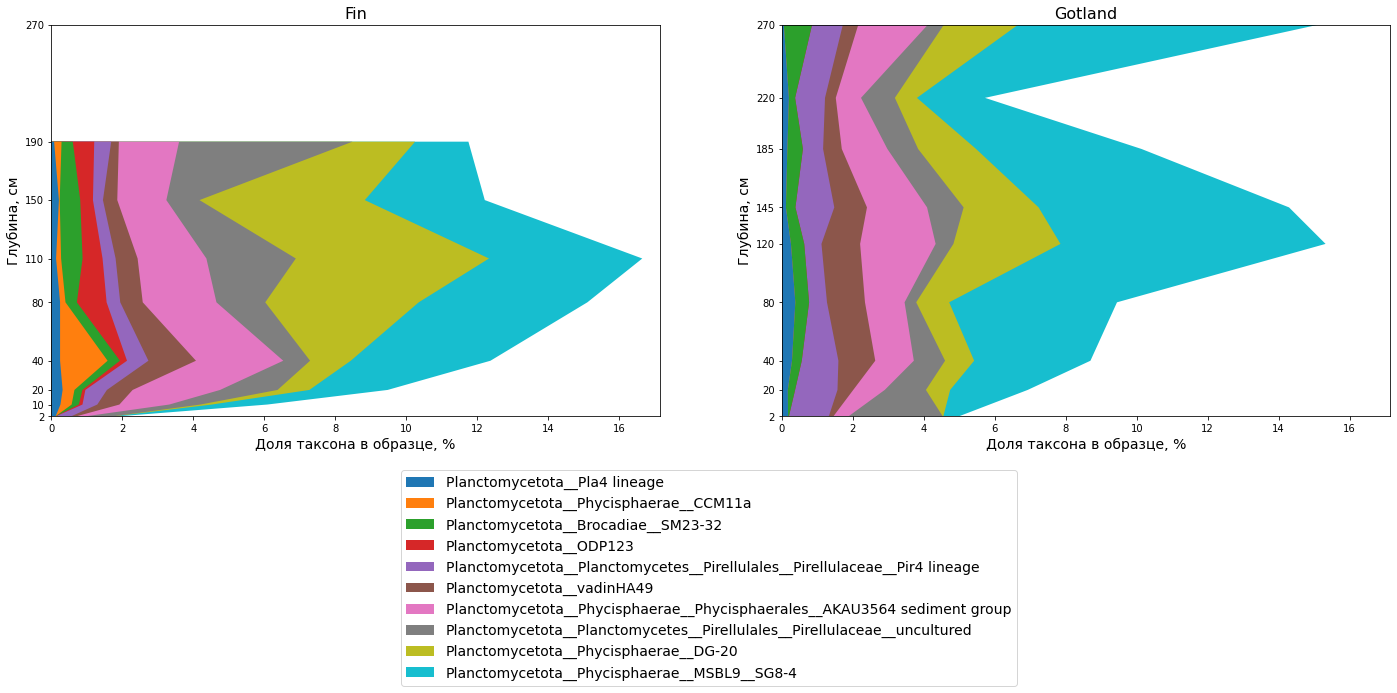

In [82]:
def plot_stacked(comp_melted, phylum, filepath=None, bpos=0.12, show=True, cutoff=.2):
    columns = ['Fin', 'Gotland']

    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches((24, 8))

    max_share = 0
    yticks_max = 0
    both_stacked = []
    for sample in columns:
        one_cm = comp_melted[(comp_melted.phylum == phylum) & (comp_melted.Column == sample)]
        stacked = one_cm.pivot(index="Depth", columns="FullTaxa", values="share")
        stacked = stacked.loc[:, (stacked.mean(axis=0) > cutoff)]
        stacked = stacked.iloc[:, stacked.mean(axis=0).values.argsort()]
        max_share = max(max_share, stacked.sum(axis=1).max())
        yticks_max = max(yticks_max, stacked.index.max())
        # scale to one
        # stacked = (stacked / stacked.sum(axis=1).values.reshape(-1, 1))
        both_stacked.append(stacked)
    
    # add missing common phylums and sort identically both stacked tables
    for c in set(both_stacked[0].columns) - set(both_stacked[1].columns):
        both_stacked[1][c] = 0.0
    for c in set(both_stacked[1].columns) - set(both_stacked[0].columns):
        both_stacked[0][c] = 0.0
    _order = both_stacked[0].mean(axis=0).values.argsort()
    order = both_stacked[0].columns[_order]

    # plot
    for im, stacked in enumerate(both_stacked):
        stacked = stacked[order]
        data = np.cumsum(stacked.values, axis=1)
        for i, col in enumerate(stacked.columns):
            axs[im].fill_betweenx(stacked.index, data[:,i], label=col, zorder=-i)  # TODO add coloring here using dict[i, color] like dict[i, label(col)]
        axs[im].margins(y=0)
        axs[im].set_xlim(0, max_share + .5)
        axs[im].set_axisbelow(False)
        axs[im].set_ylabel("Глубина, см", fontsize=14)
        axs[im].set_xlabel("Доля таксона в образце, %", fontsize=14)
        axs[im].set_title(columns[im], fontsize=16)
        axs[im].grid(False)

        # Shrink current axis's height by 10% on the bottom
        box = axs[im].get_position()
        new_box = [
            box.x0, box.y0 + box.height * 0.1,
            box.width, box.height * 0.9
        ]
        axs[im].set_position(new_box)
        
        yticks = stacked.index.values
        if yticks.max() < yticks_max:
            yticks = list(stacked.index.values) + [yticks_max]
        axs[im].set_yticks(yticks)

        # Put a legend below current axis
        if im == 0:
            axs[im].legend(loc='upper center', bbox_to_anchor=(1.08, -bpos), ncol=1, fontsize=14)

    if filepath is not None:
        plt.savefig(filepath, bbox_inches='tight')
    if show:
        plt.show()
    else:
        plt.close(fig)


plot_stacked(comp_melted, "Planctomycetota")

In [83]:
phylums = ["Actinobacteriota", "Chloroflexi", "Desulfobacterota", "Planctomycetota", "Proteobacteria"]
for ph in phylums:     
    plot_stacked(comp_melted, ph, f"../figures/{ph}.png", show=False)
